In [90]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [91]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [92]:
# data look up.
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [93]:
# share of dataframe.
telecom.shape

(99999, 226)

In [94]:
# Understand Data
print ("Rows     : " ,telecom.shape[0])
print ("Columns  : " ,telecom.shape[1])
print ("\nFeatures : \n" ,telecom.columns.tolist())
print ("\nMissing values :  ", telecom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telecom.nunique())

Rows     :  99999
Columns  :  226

Features : 
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og

In [95]:
telecom.dropna(thresh=2, axis=1)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [96]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [97]:
#Find columns with only single non-null value
redundant_cols = [col for col in telecom.columns if telecom[col].nunique()==1]
telecom = telecom.drop(redundant_cols, axis=1)
print('Following columns were removed: \n',redundant_cols)

Following columns were removed: 
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [98]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: float64(168), int64(34), object(8)
memory usage: 160.2+ MB


In [99]:
# Add more features to dataframe using existing columns.
def getTotalOf4Months(columns):
    total = 0;
    for col in columns:
        for month in [6,7,8]:
            total = total + telecom[col+str(month)]
    return total;

def getTotal(columns):
    total = 0;
    for col in columns:
       total = total + telecom[col]
    return total;

# average revenue per user.
telecom['revenue_678'] = getTotalOf4Months(['arpu_']);
# average onnet or offnet usage.
telecom['onnet_678'] = getTotalOf4Months(['onnet_mou_']);
telecom['offnet_678'] = getTotalOf4Months(['offnet_mou_']);
# recharges
telecom['recharges_678'] = getTotalOf4Months(['total_rech_amt_','last_day_rch_amt_']);
# incoming and outgoings.
telecom['incoming_678'] = getTotalOf4Months(['total_ic_mou_','spl_ic_mou_','ic_others_']);
telecom['outgoing_678'] = getTotalOf4Months(['total_og_mou_','spl_og_mou_','og_others_']);
# operator incoming and outgoing calls.
telecom['incoming_operator_678'] = getTotalOf4Months(['loc_ic_t2t_mou_','loc_ic_t2m_mou_','loc_ic_t2f_mou_','std_ic_t2t_mou_',
                                                 'std_ic_t2m_mou_','std_ic_t2f_mou_']);
telecom['outgoing_operator_678'] = getTotalOf4Months(['loc_og_t2t_mou_','loc_og_t2m_mou_','loc_og_t2m_mou_','loc_og_t2f_mou_',
                                                 'loc_og_t2c_mou_','std_og_t2t_mou_','std_og_t2m_mou_','std_og_t2f_mou_']);
# data usage.
telecom['data_usage_mb_678'] = getTotalOf4Months(['vol_2g_mb_','vol_3g_mb_','og_others_']);
# revenue on data usage.
telecom['arpu_data_678'] = getTotalOf4Months(['arpu_3g_','arpu_2g_','og_others_']);


# average revenue per user - Last Month.
telecom['revenue_lm'] = getTotal(['arpu_9']);
# average onnet or offnet usage.- Last Month.
telecom['onnet_lm'] = getTotal(['onnet_mou_9']);
telecom['offnet_lm'] = getTotal(['offnet_mou_9']);
# recharges- Last Month.
telecom['recharges_lm'] = getTotal(['total_rech_amt_9','last_day_rch_amt_9']);
# incoming and outgoings.- Last Month.
telecom['incoming_lm'] = getTotal(['total_ic_mou_9','spl_ic_mou_9','ic_others_9']);
telecom['outgoing_lm'] = getTotal(['total_og_mou_9','spl_og_mou_9','og_others_9']);
# operator incoming and outgoing calls.- Last Month.
telecom['incoming_operator_lm'] = getTotal(['loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9',
                                                    'std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9']);
telecom['outgoing_operator_lm'] = getTotal(['loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9',
                                                 'loc_og_t2c_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9']);
# data usage.- Last Month.
telecom['data_usage_mb_lm'] = getTotal(['vol_2g_mb_9','vol_3g_mb_9','og_others_9']);
# revenue on data usage.- Last Month.
telecom['arpu_data_lm'] = getTotal(['arpu_3g_9','arpu_2g_9','og_others_9']);

telecom.fillna(0)


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,revenue_lm,onnet_lm,offnet_lm,recharges_lm,incoming_lm,outgoing_lm,incoming_operator_lm,outgoing_operator_lm,data_usage_mb_lm,arpu_data_lm
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,...,21.100,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,86.285,18.34,53.76,121,188.04,72.11,188.03,125.86,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,290.714,74.81,118.91,358,518.55,167.02,516.88,111.47,8.42,2.84
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,389.500,241.71,113.54,440,306.73,405.83,304.00,384.67,0.00,0.00
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,163.426,58.78,45.81,250,205.49,110.57,205.11,136.49,0.00,0.00
5,7000286308,50.258,58.810,83.386,170.826,50.16,43.63,85.48,138.79,19.28,...,170.826,138.79,46.91,130,206.35,185.71,204.42,230.48,0.00,0.00
6,7001051193,429.023,190.704,255.114,114.751,71.03,45.03,76.66,15.23,262.73,...,114.751,15.23,50.33,165,2572.49,66.26,2572.48,115.89,0.35,0.00
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,...,500.000,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,166.787,33.46,108.71,186,34.91,142.18,34.90,176.75,0.00,0.00
9,7001864400,119.518,247.435,170.231,160.042,33.89,30.11,22.43,27.84,63.48,...,160.042,27.84,123.48,230,412.63,151.33,384.48,188.56,0.00,0.00


In [100]:
#since, all values for the columns used below are non-nulls, we need not do any imputation here
if 'av_rech_67' not in list(telecom.columns):
    telecom['av_rech_67'] =  (telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/(telecom['total_rech_num_6']+telecom['total_rech_num_7'])
    avg_70_quantile = telecom.av_rech_67.quantile(q=0.7)
    telecom = telecom[telecom.av_rech_67>= avg_70_quantile]
print ('Data is now at 70th quantile of average recharge for the first 2 months. Total rows remaining: '+ str(len(telecom)))


Data is now at 70th quantile of average recharge for the first 2 months. Total rows remaining: 29944


In [101]:
telecom.fillna(0)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,onnet_lm,offnet_lm,recharges_lm,incoming_lm,outgoing_lm,incoming_operator_lm,outgoing_operator_lm,data_usage_mb_lm,arpu_data_lm,av_rech_67
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,87.714286
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,237.000000
9,7001864400,119.518,247.435,170.231,160.042,33.89,30.11,22.43,27.84,63.48,...,27.84,123.48,230,412.63,151.33,384.48,188.56,0.00,0.00,69.166667
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,244.81,214.06,353,652.17,446.09,352.18,554.30,0.00,0.00,76.000000
16,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,31.34,224.39,440,334.56,255.74,334.54,457.20,0.00,0.00,57.375000
19,7001754084,163.430,241.218,326.920,75.229,4.04,7.38,13.61,22.19,0.51,...,22.19,3.11,60,50.38,25.31,50.37,28.41,0.00,0.00,89.600000
20,7001028254,271.699,421.474,364.251,241.434,72.41,86.73,71.18,56.24,198.84,...,56.24,237.58,500,243.56,296.98,238.28,475.53,0.00,0.00,85.875000
22,7001121249,281.076,26.291,0.000,0.300,36.59,5.09,0.00,0.50,388.51,...,0.50,0.18,0,7.51,0.86,7.51,0.50,0.00,0.00,57.000000
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,15.74,111.88,252,127.48,137.98,127.47,205.06,328.67,424.34,56.750000
24,7001125315,422.050,359.730,354.793,473.030,124.19,55.19,141.11,138.04,450.33,...,138.04,481.86,421,330.03,644.21,330.00,823.28,0.00,0.00,77.000000


In [102]:
print ("\nFeatures : \n" ,telecom.columns.tolist())


Features : 
 ['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_

In [103]:
# define customer will churn or not based on last month records.

def churn_or_not (row):
   if row['total_ic_mou_9'] + row['total_og_mou_9'] + row['vol_2g_mb_9'] + row['vol_3g_mb_9'] > 0 :
      return 0
   else:
      return 1
telecom['churn'] =  telecom.apply (lambda row: churn_or_not(row), axis=1)

In [104]:
# Percentage of Customers may churn.
churn_data = telecom.loc[telecom['churn'] > 0, :]
percentage_of_churn = churn_data.shape[0] * 100 / telecom.shape[0]

print(str(round(percentage_of_churn, 2)) + '% customers may churn')


8.69% customers may churn


In [105]:
# drop all columns of months.
for month in [6,7,8,9]:
    suffix = '_'+str(month)
    telecom = telecom.drop([x for x in telecom if x.endswith(suffix)], axis=1)


In [106]:
# drop all rows with more than 5 null values, and fill remaing Null with 0.
telecom = telecom.dropna(thresh=5)
telecom = telecom.fillna(0)

In [107]:
# make sure there is no null values in dataframe.
telecom.isnull().sum()

mobile_number            0
aon                      0
aug_vbc_3g               0
jul_vbc_3g               0
jun_vbc_3g               0
sep_vbc_3g               0
revenue_678              0
onnet_678                0
offnet_678               0
recharges_678            0
incoming_678             0
outgoing_678             0
incoming_operator_678    0
outgoing_operator_678    0
data_usage_mb_678        0
arpu_data_678            0
revenue_lm               0
onnet_lm                 0
offnet_lm                0
recharges_lm             0
incoming_lm              0
outgoing_lm              0
incoming_operator_lm     0
outgoing_operator_lm     0
data_usage_mb_lm         0
arpu_data_lm             0
av_rech_67               0
churn                    0
dtype: int64

In [108]:
# get insite about data frame.
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29944 entries, 0 to 99998
Data columns (total 28 columns):
mobile_number            29944 non-null int64
aon                      29944 non-null int64
aug_vbc_3g               29944 non-null float64
jul_vbc_3g               29944 non-null float64
jun_vbc_3g               29944 non-null float64
sep_vbc_3g               29944 non-null float64
revenue_678              29944 non-null float64
onnet_678                29944 non-null float64
offnet_678               29944 non-null float64
recharges_678            29944 non-null int64
incoming_678             29944 non-null float64
outgoing_678             29944 non-null float64
incoming_operator_678    29944 non-null float64
outgoing_operator_678    29944 non-null float64
data_usage_mb_678        29944 non-null float64
arpu_data_678            29944 non-null float64
revenue_lm               29944 non-null float64
onnet_lm                 29944 non-null float64
offnet_lm                29944 no

### Modal Selection.

In [109]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = telecom.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom['churn']

y.head()

0     1
7     1
9     0
13    0
16    0
Name: churn, dtype: int64

In [110]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [111]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20960
Model:                            GLM   Df Residuals:                    20933
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Jun 2019   Deviance:                          nan
Time:                        16:56:55   Pearson chi2:                 6.95e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.359e+14   1.11e+06   4.84e+08      0.000    5.36e+14    5.36e+14
aon                    -9.04e+10    462.311  -1.96e+08      0.000   -9.04e+10   -9.04e+10
aug_vbc_3g            -5.706e+10   1799.439  -3.17e+07      0.000   -5.71e+10   -5.71e+10
jul_vbc_3g            -4.535e+10   1968.984   -2.3e+07      0.000   -4.53e+10   -4.53e+10
jun_vbc_3g             9.691e+10   1732.176   5.59e+07      0.000    9.69e+10    9.69e+10
sep_vbc_3g             5.028e+11   1.09e+04   4.62e+07      0.000    5.03e+11    5.03e+11
revenue_678            5.361e+11   1698.116   3.16e+08      0.000    5.36e+11    5.36e+11
onnet_678               7.79e+10   2446.409   3.18e+07      0.000    7.79e+10    7.79e+10
offnet_678             8.032e+10   2412.556   3.33e+07      0.000    8.03e+10    8.03e+10
recharges_678         -2.617e+11   1343.943  -1.95e+08      0.000   -2.62e+11   -2.62e+11
incoming_678          -2.222e+11   2162.600  -1.03e+08      0.000   -2.22e+11   -2.22e+11
outgoing_678           1.028e+11   2781.513    3.7e+07      0.000    1.03e+11    1.03e+11
incoming_operator_678  2.632e+11   2397.368    1.1e+08      0.000    2.63e+11    2.63e+11
outgoing_operator_678 -1.933e+11   1466.590  -1.32e+08      0.000   -1.93e+11   -1.93e+11
data_usage_mb_678     -1.079e+11    454.964  -2.37e+08      0.000   -1.08e+11   -1.08e+11
arpu_data_678          3.734e+10   1166.094    3.2e+07      0.000    3.73e+10    3.73e+10
revenue_lm            -8.702e+11   2890.079  -3.01e+08      0.000    -8.7e+11    -8.7e+11
onnet_lm               1.936e+12   7518.991   2.58e+08      0.000    1.94e+12    1.94e+12
offnet_lm              1.504e+12   7392.805   2.03e+08      0.000     1.5e+12     1.5e+12
recharges_lm          -7.246e+11   1771.968  -4.09e+08      0.000   -7.25e+11   -7.25e+11
incoming_lm           -1.401e+12   6603.766  -2.12e+08      0.000    -1.4e+12    -1.4e+12
outgoing_lm           -3.198e+12   8512.421  -3.76e+08      0.000    -3.2e+12    -3.2e+12
incoming_operator_lm  -3.778e+12   7240.307  -5.22e+08      0.000   -3.78e+12   -3.78e+12
outgoing_operator_lm   4.278e+10   4440.686   9.63e+06      0.000    4.28e+10    4.28e+10
data_usage_mb_lm      -4.488e+11   1055.300  -4.25e+08      0.000   -4.49e+11   -4.49e+11
arpu_data_lm          -3.883e+11   3031.616  -1.28e+08      0.000   -3.88e+11   -3.88e+11
av_rech_67             1.208e+12   7652.798   1.58e+08      0.000    1.21e+12    1.21e+12
=========================================================================================
"""

### Running Your First Training Model


In [112]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

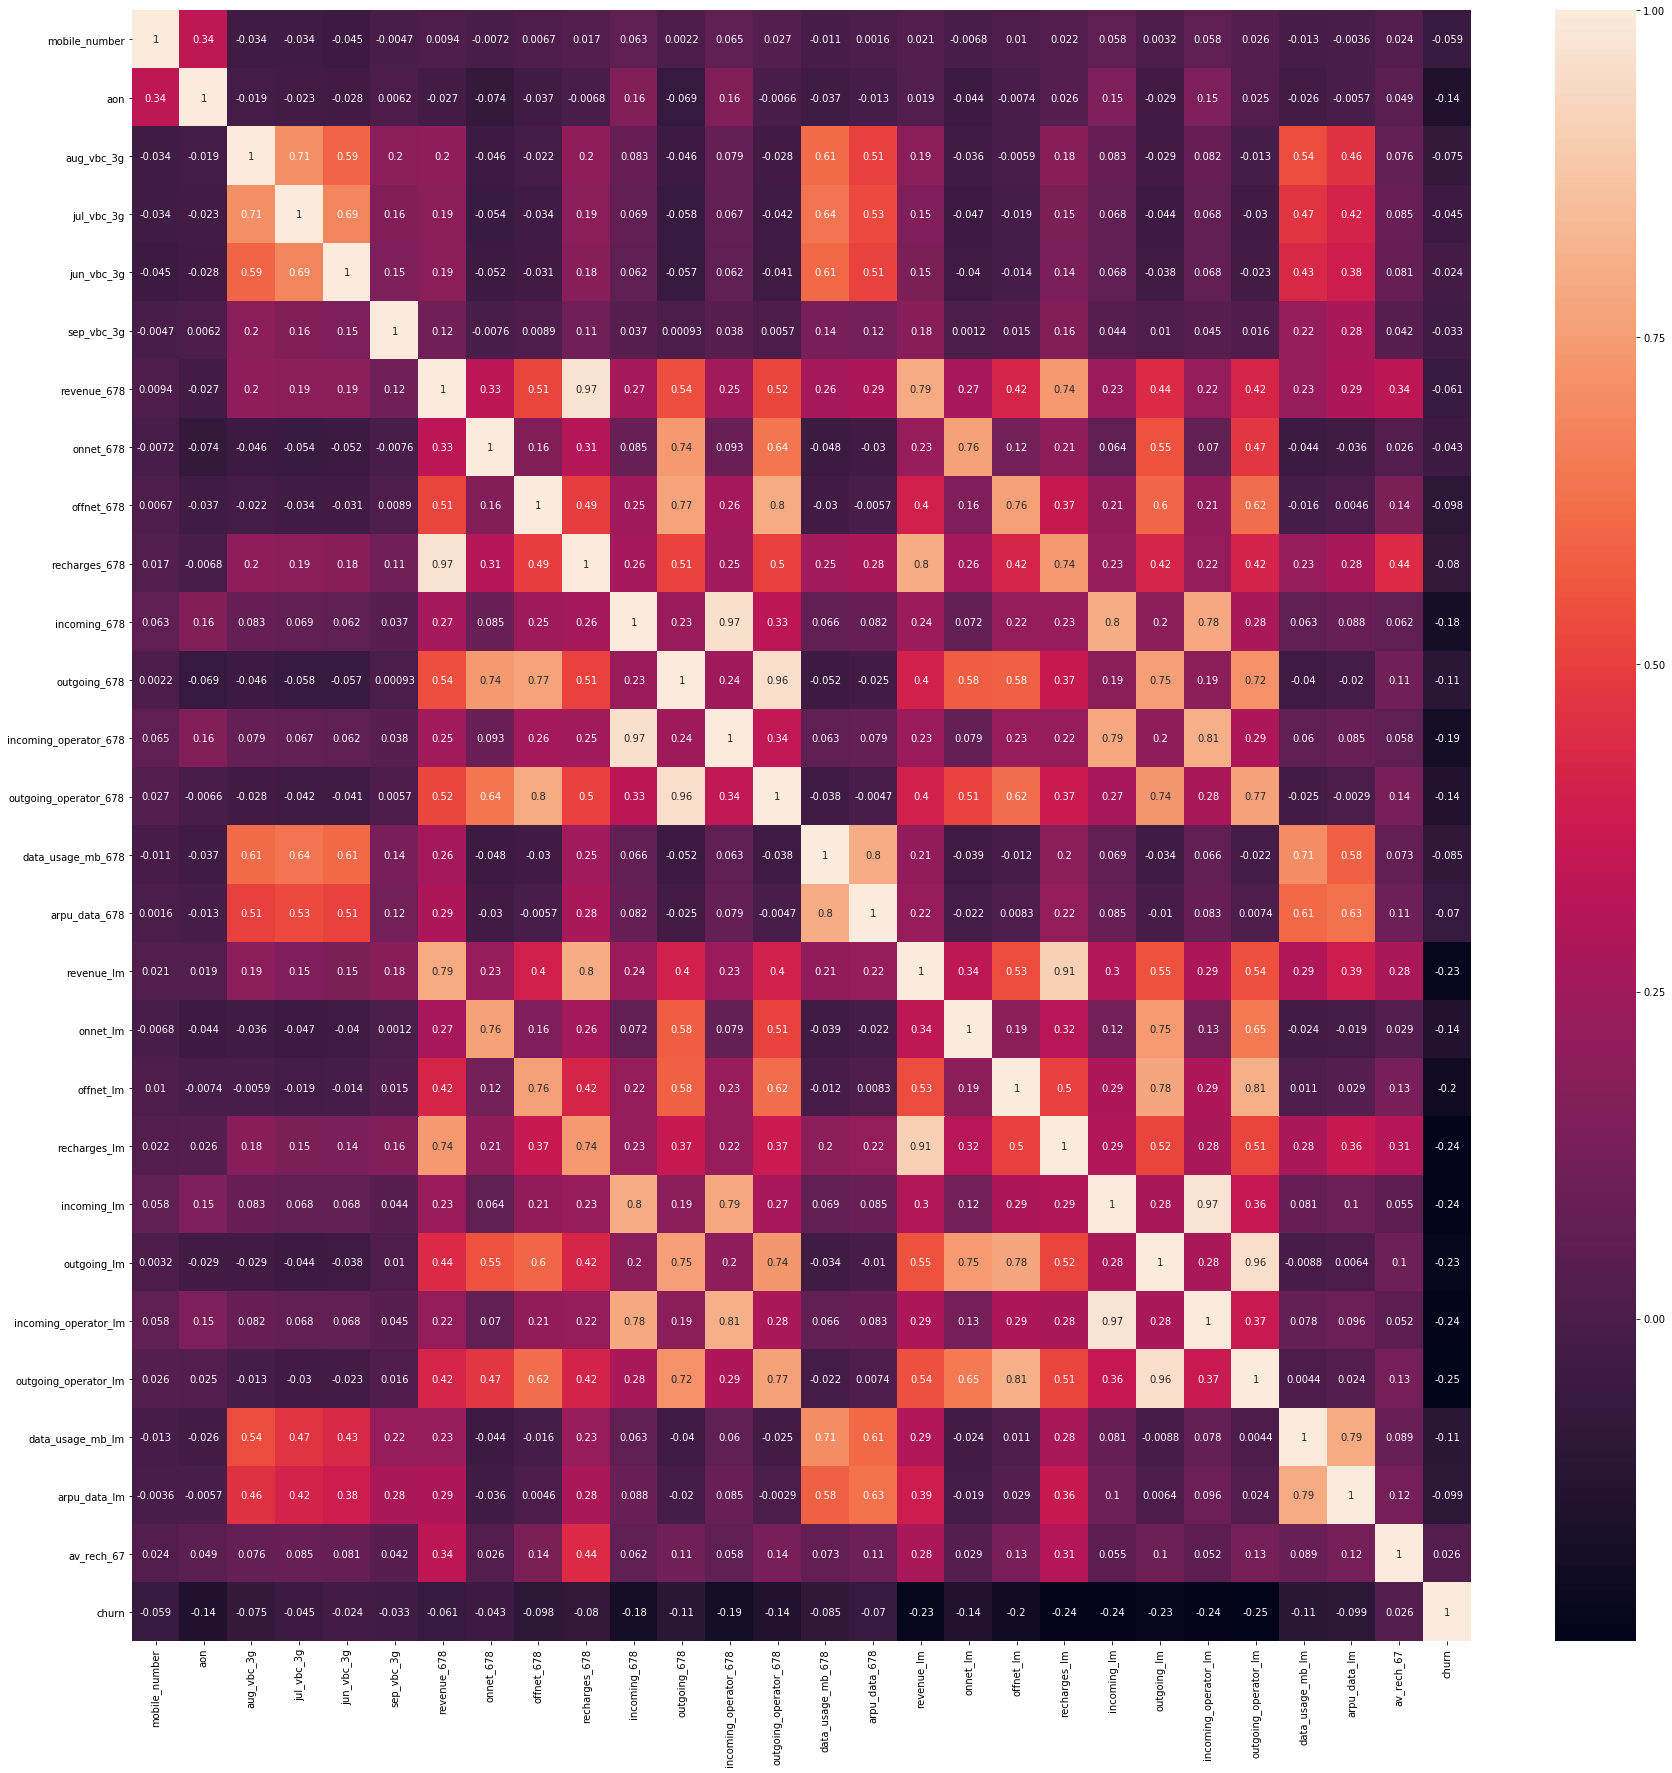

In [113]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

In [114]:
telecom = telecom.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','sep_vbc_3g'], axis=1)

In [115]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29944 entries, 0 to 99998
Data columns (total 24 columns):
mobile_number            29944 non-null int64
aon                      29944 non-null int64
revenue_678              29944 non-null float64
onnet_678                29944 non-null float64
offnet_678               29944 non-null float64
recharges_678            29944 non-null int64
incoming_678             29944 non-null float64
outgoing_678             29944 non-null float64
incoming_operator_678    29944 non-null float64
outgoing_operator_678    29944 non-null float64
data_usage_mb_678        29944 non-null float64
arpu_data_678            29944 non-null float64
revenue_lm               29944 non-null float64
onnet_lm                 29944 non-null float64
offnet_lm                29944 non-null float64
recharges_lm             29944 non-null int64
incoming_lm              29944 non-null float64
outgoing_lm              29944 non-null float64
incoming_operator_lm     29944 non-

## PDA

In [116]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(X,y)

# get supported feature columns.
X1 = X.iloc[:, rfe.support_]
features = list( X1.columns) 

print(rfe.support_) 
print(rfe.ranking_)
print(features)


[False False False False False  True False False  True False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True]
[ 7  2  8 12  4  1  5  3  1 10  6 13 11 14  9  1  1  1  1  1  1  1  1  1
  1  1]
['revenue_678', 'recharges_678', 'revenue_lm', 'onnet_lm', 'offnet_lm', 'recharges_lm', 'incoming_lm', 'outgoing_lm', 'incoming_operator_lm', 'outgoing_operator_lm', 'data_usage_mb_lm', 'arpu_data_lm', 'av_rech_67']


In [117]:
# Run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [118]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20960
Model:                            GLM   Df Residuals:                    20933
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Jun 2019   Deviance:                          nan
Time:                        16:57:26   Pearson chi2:                 6.95e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.359e+14   1.11e+06   4.84e+08      0.000    5.36e+14    5.36e+14
aon                    -9.04e+10    462.311  -1.96e+08      0.000   -9.04e+10   -9.04e+10
aug_vbc_3g            -5.706e+10   1799.439  -3.17e+07      0.000   -5.71e+10   -5.71e+10
jul_vbc_3g            -4.535e+10   1968.984   -2.3e+07      0.000   -4.53e+10   -4.53e+10
jun_vbc_3g             9.691e+10   1732.176   5.59e+07      0.000    9.69e+10    9.69e+10
sep_vbc_3g             5.028e+11   1.09e+04   4.62e+07      0.000    5.03e+11    5.03e+11
revenue_678            5.361e+11   1698.116   3.16e+08      0.000    5.36e+11    5.36e+11
onnet_678               7.79e+10   2446.409   3.18e+07      0.000    7.79e+10    7.79e+10
offnet_678             8.032e+10   2412.556   3.33e+07      0.000    8.03e+10    8.03e+10
recharges_678         -2.617e+11   1343.943  -1.95e+08      0.000   -2.62e+11   -2.62e+11
incoming_678          -2.222e+11   2162.600  -1.03e+08      0.000   -2.22e+11   -2.22e+11
outgoing_678           1.028e+11   2781.513    3.7e+07      0.000    1.03e+11    1.03e+11
incoming_operator_678  2.632e+11   2397.368    1.1e+08      0.000    2.63e+11    2.63e+11
outgoing_operator_678 -1.933e+11   1466.590  -1.32e+08      0.000   -1.93e+11   -1.93e+11
data_usage_mb_678     -1.079e+11    454.964  -2.37e+08      0.000   -1.08e+11   -1.08e+11
arpu_data_678          3.734e+10   1166.094    3.2e+07      0.000    3.73e+10    3.73e+10
revenue_lm            -8.702e+11   2890.079  -3.01e+08      0.000    -8.7e+11    -8.7e+11
onnet_lm               1.936e+12   7518.991   2.58e+08      0.000    1.94e+12    1.94e+12
offnet_lm              1.504e+12   7392.805   2.03e+08      0.000     1.5e+12     1.5e+12
recharges_lm          -7.246e+11   1771.968  -4.09e+08      0.000   -7.25e+11   -7.25e+11
incoming_lm           -1.401e+12   6603.766  -2.12e+08      0.000    -1.4e+12    -1.4e+12
outgoing_lm           -3.198e+12   8512.421  -3.76e+08      0.000    -3.2e+12    -3.2e+12
incoming_operator_lm  -3.778e+12   7240.307  -5.22e+08      0.000   -3.78e+12   -3.78e+12
outgoing_operator_lm   4.278e+10   4440.686   9.63e+06      0.000    4.28e+10    4.28e+10
data_usage_mb_lm      -4.488e+11   1055.300  -4.25e+08      0.000   -4.49e+11   -4.49e+11
arpu_data_lm          -3.883e+11   3031.616  -1.28e+08      0.000   -3.88e+11   -3.88e+11
av_rech_67             1.208e+12   7652.798   1.58e+08      0.000    1.21e+12    1.21e+12
=========================================================================================
"""

In [119]:
X_test[features].shape

(8984, 13)

In [120]:
X_train[features].shape

(20960, 13)

In [121]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [122]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [123]:
pca.components_

array([[-9.50507462e-03,  1.13250264e-02,  8.03506770e-03,
         7.90716498e-03,  6.31264196e-04,  3.06632591e-01,
         1.94103040e-01,  2.82494252e-01,  3.94306746e-01,
         1.01300429e-01,  4.69252189e-01,  9.70828902e-02,
         5.55874111e-01,  7.90733212e-02,  3.18180040e-02,
         9.56430618e-02,  5.60884990e-02,  7.70920721e-02,
         1.16353037e-01,  3.15792308e-02,  1.31081947e-01,
         2.98229287e-02,  1.56711254e-01,  3.05234329e-02,
         1.28070099e-02,  5.48641120e-03],
       [-1.03656348e-02,  9.78036791e-02,  9.72650762e-02,
         9.17910005e-02,  2.85469514e-03,  1.74610738e-01,
        -9.02945290e-02, -7.84026864e-02,  2.32331916e-01,
         1.86020630e-02, -1.73300478e-01,  1.29758273e-02,
        -1.96554222e-01,  8.12486669e-01,  2.38383869e-01,
         5.85761613e-02, -2.46087507e-02, -1.71957254e-02,
         7.31737734e-02,  8.33915231e-03, -4.32695124e-02,
         6.60829154e-03, -4.93596453e-02,  2.58515764e-01,
         8.10

In [124]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.009505,-0.010366,aon
1,0.011325,0.097804,aug_vbc_3g
2,0.008035,0.097265,jul_vbc_3g
3,0.007907,0.091791,jun_vbc_3g
4,0.000631,0.002855,sep_vbc_3g
5,0.306633,0.174611,revenue_678
6,0.194103,-0.090295,onnet_678
7,0.282494,-0.078403,offnet_678
8,0.394307,0.232332,recharges_678
9,0.101300,0.018602,incoming_678


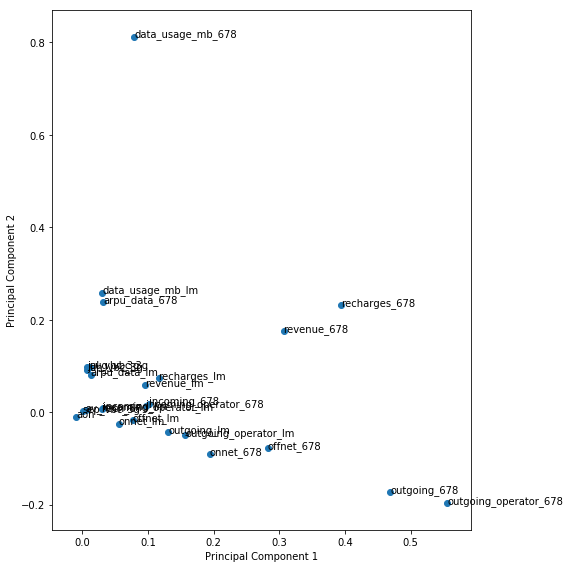

In [125]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [126]:
pca.explained_variance_ratio_

array([4.43565070e-01, 2.40382759e-01, 9.69656882e-02, 6.61593293e-02,
       4.29791526e-02, 3.72375054e-02, 1.97943274e-02, 1.43943106e-02,
       7.13002916e-03, 6.94865525e-03, 5.68016544e-03, 4.63852337e-03,
       2.37853464e-03, 2.19206927e-03, 2.10229094e-03, 1.77883287e-03,
       1.46264183e-03, 1.23100656e-03, 9.20338726e-04, 7.97009195e-04,
       7.15872334e-04, 2.09250062e-04, 1.35871555e-04, 8.46204589e-05,
       6.83228596e-05, 4.78228196e-05])

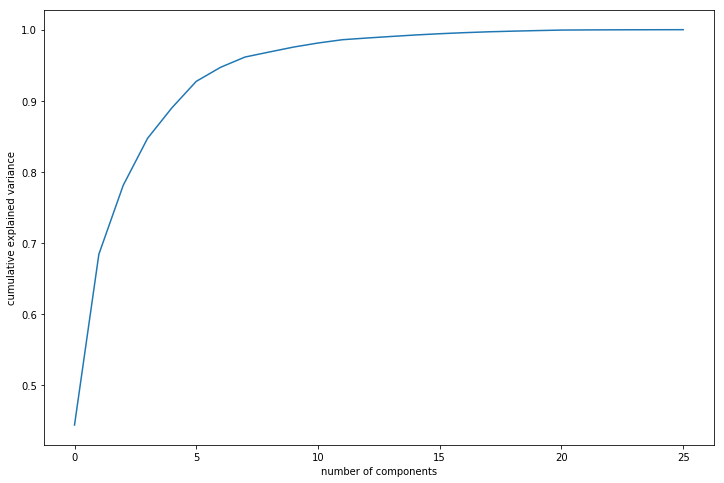

In [127]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [128]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

# from above graph looks like 10 component is fair enough.

In [129]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20960, 10)

In [130]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

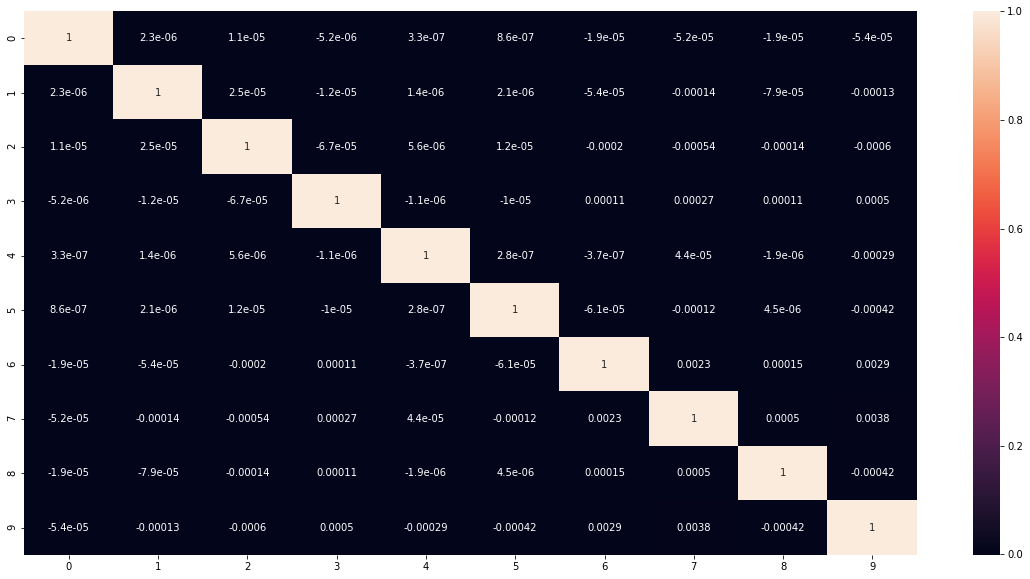

In [131]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [132]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.003816034732221142 , min corr:  -0.0006047728462069847


In [133]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8984, 10)

In [134]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [135]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.98'

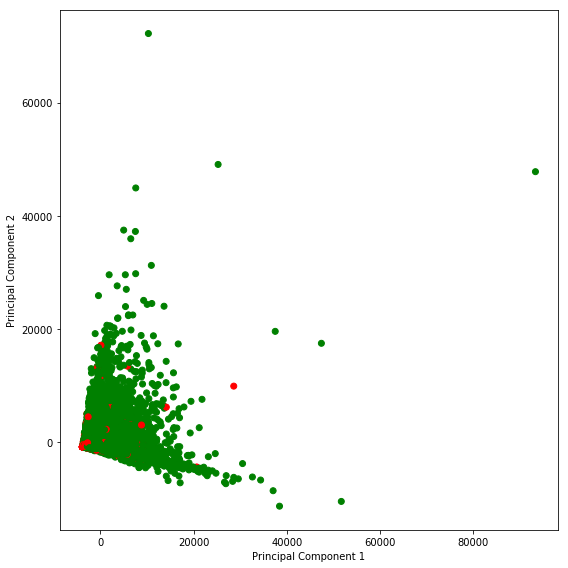

In [136]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
train,test = train_test_split(telecom,test_size = .25 ,random_state = 111)

def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","churn"],
                        y = ["Not churn","churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
    
    py.iplot(fig)
    
    
telecom_churn_prediction(logit,X_train,X_test,y_train,y_test,
                         features,"coefficients")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8183
           1       0.93      0.99      0.96       801

   micro avg       0.99      0.99      0.99      8984
   macro avg       0.97      0.99      0.98      8984
weighted avg       0.99      0.99      0.99      8984

Accuracy   Score :  0.9925422974176313
Area under curve :  0.9902749724887152 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



In [138]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(X,y)

# get supported feature columns.
X1 = X.iloc[:, rfe.support_]
features = list( X1.columns) 

#separating train and test data
train_rf_X = X[features]
train_rf_Y = y
test_rf_X  = test[features]
test_rf_Y  = test['churn']

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit,X_train,X_test,y_train,y_test,
                         features,"coefficients")



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8183
           1       0.93      0.99      0.96       801

   micro avg       0.99      0.99      0.99      8984
   macro avg       0.97      0.99      0.98      8984
weighted avg       0.99      0.99      0.99      8984

Accuracy   Score :  0.9925422974176313
Area under curve :  0.9902749724887152 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X1, y)

# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found